In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler




#Data exploration#

In [104]:
df = pd.read_csv(r'F:\level 2\semester 4\ML\train.csv')
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [70]:
df.shape

(891, 12)

In [71]:
df.duplicated().any()

False

In [72]:
df.info()
# age change to int sex change to 0 and 1 
#feature Enginering to Pclass cabin embarked 
# turn sex ti 0 and 1 
#remove na

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
df.describe()
# min in age is -ve  # min in fare is -ve 
# mean in age 

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#check outliers

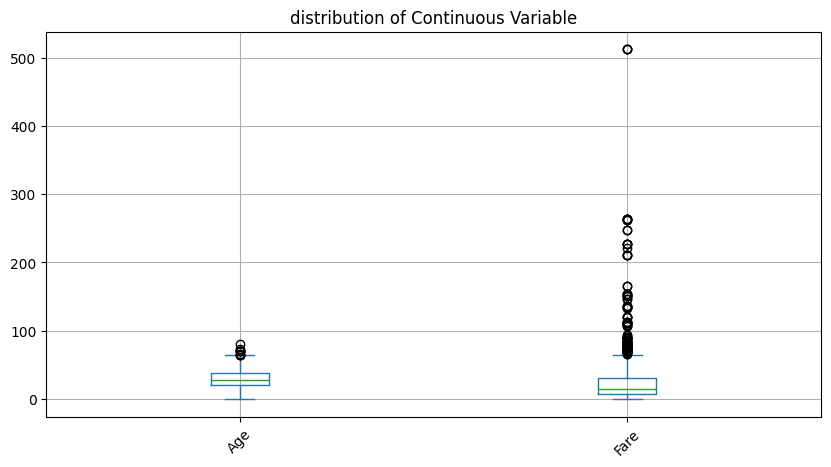

In [75]:
cont_col= df[["Age", "Fare"]]
cont_col.plot(kind="box",figsize=(10,5),rot=45,grid=True)
plt.title("distribution of Continuous Variable")
plt.show()
#cont_col.plot(kind="hist",figsize=(16,5),rot=45,grid=True)

check wrong entries

In [76]:
for col in df.columns:
    unique_vals = df[col].dropna().unique()  # استبعاد القيم NaN
    try:
        unique_vals = sorted(unique_vals)  # الترتيب لو القيم أرقام أو قابلة للترتيب
    except:
        unique_vals = sorted(unique_vals, key=str)  # لو القيم نصوص أو فئات
    print(f"{col}:\n{unique_vals}")
    print("-" * 50)
    # no incorrect entries except fare and age 

PassengerId:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [77]:
df.shape

(891, 12)

data preprocessing

In [79]:

df["Age"] = df["Age"].fillna(df["Age"].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df= df.drop(columns=['Cabin','PassengerId','Name','Ticket'])

df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [80]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [81]:
df.shape

(891, 8)

In [82]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   28.566970    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.199572    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   24.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
df['Age']=df['Age'].round().astype("int")
df['Survived']=df['Survived'].round().astype("int")

In [84]:
df.head()

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    male   22      1      0   7.2500        S
1         1       1  female   38      1      0  71.2833        C
2         1       3  female   26      0      0   7.9250        S
3         1       1  female   35      1      0  53.1000        S
4         0       3    male   35      0      0   8.0500        S

#Feature Enginering#

In [ ]:
train_categorical_features = ['Pclass', 'Sex', 'Embarked']

# pandas has a pandas.get_dummies() function that takes in a series
#     and returns a HOT encoded dataframe of that series

for feature in train_categorical_features:
    dummies = pd.get_dummies(df[feature]).add_prefix(feature + '_')
    df = df.drop(columns=[feature])  # Drop the original categorical feature

    df = df.join(dummies)

In [86]:
df.head()

Survived  Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0         0   22      1      0   7.2500     False     False      True   
1         1   38      1      0  71.2833      True     False     False   
2         1   26      0      0   7.9250     False     False      True   
3         1   35      1      0  53.1000      True     False     False   
4         0   35      0      0   8.0500     False     False      True   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0       False      True       False       False        True  
1        True     False        True       False       False  
2        True     False       False       False        True  
3        True     False       False       False        True  
4       False      True       False       False        True

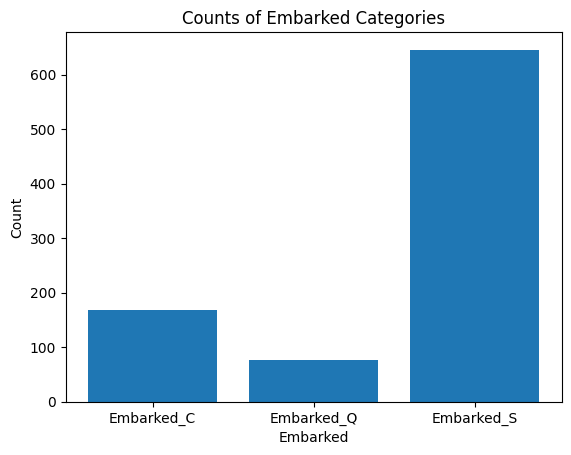

In [ ]:

x = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Count how many 1s are in each column
counts = [df[col].sum() for col in x]

# Plot
plt.bar(x, counts)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Counts of Embarked Categories')
plt.show()


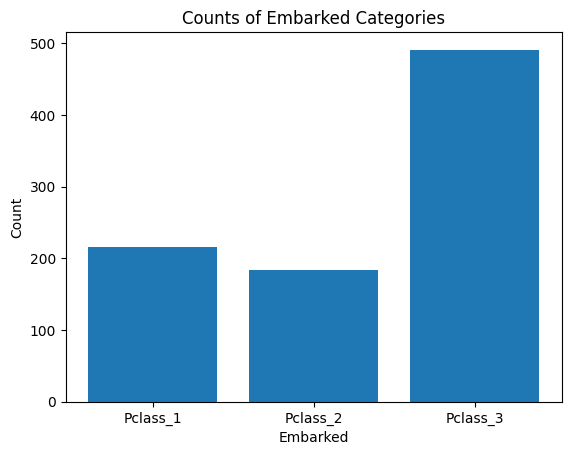

[216, 184, 491]


In [89]:
cols=['Pclass_1','Pclass_2','Pclass_3']
counts = [df[col].sum() for col in cols]

# Plot
plt.bar(cols, counts)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Counts of Embarked Categories')
plt.show()
print(counts)

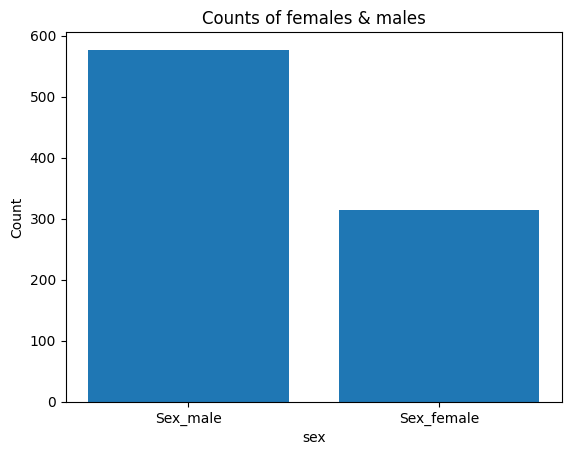

[577, 314]

In [90]:
column3 = ['Sex_male', 'Sex_female']

# Count how many 1s are in each column
counts3 = [df[col3].sum() for col3 in column3]

# Plot
plt.bar(column3, counts3)
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Counts of females & males')
plt.show()
counts3

In [91]:
corr_matrix = df.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived      1.000000
Sex_female    0.543351
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Pclass_2      0.093349
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.052543
Embarked_S   -0.149683
Pclass_3     -0.322308
Sex_male     -0.543351
Name: Survived, dtype: float64


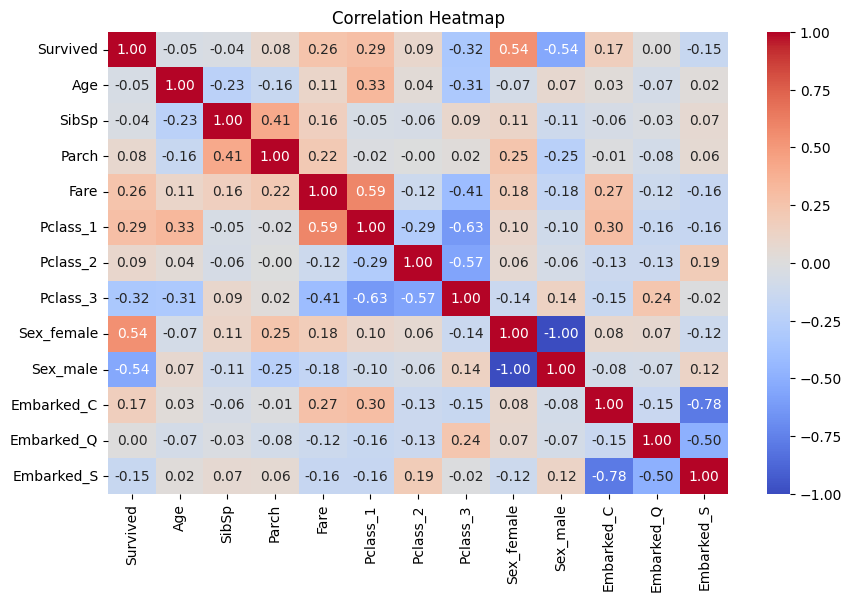

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [94]:
df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [95]:
original_train_set_without_survived = df.drop("Survived", axis=1)
orginal_train_set_with_only_survived = df["Survived"]

In [96]:
x_train, x_test, y_train, y_test = train_test_split(
    original_train_set_without_survived, orginal_train_set_with_only_survived, train_size=0.8, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 12) (712,)
(179, 12) (179,)


In [ ]:
sc = StandardScaler()

## transforming "train_x"
x_train = sc.fit_transform(x_train)
## transforming "test_x"
x_test = sc.transform(x_test)


Logistic Regression

In [98]:
## call on the model object
logreg = LogisticRegression()

## fit the model with "train_x" and "train_y"
logreg.fit(x_train,y_train)

LogisticRegression()

In [99]:
y_pred = logreg.predict(x_test)
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))

So, Our accuracy Score is: 0.81564246


In [101]:
cm=confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[92 18]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       110
           1       0.75      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



##Logistic Regression Part

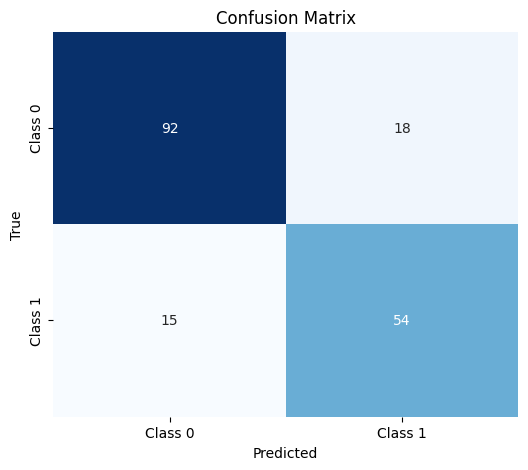

In [102]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()